<a href="https://colab.research.google.com/github/joshpodl/Exploration-of-public-health-data/blob/main/An_Exploration_Of_Public_Health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import csv
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', index_col = 0)
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# data cleaning: replace ? with NaN
df = df.replace('?', np.nan)
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),<NA>,6,25,1,1,<NA>,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),<NA>,1,1,7,3,<NA>,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),<NA>,1,1,7,2,<NA>,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),<NA>,1,1,7,2,<NA>,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),<NA>,1,1,7,1,<NA>,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
# average stay by race
average_stay = df.groupby('race')['time_in_hospital'].mean()
average_stay.head()

,time_in_hospital
race,
AfricanAmerican,4.507860
Asian,3.995320
Caucasian,4.385721
Hispanic,4.059892
Other,4.273572


In [14]:
# comparison groups
group_1 = average_stay.idxmin()
print(f"The race with the shortest average stay is {group_1}")

group_2 = average_stay.idxmax()
print(f"The race with the longest average stay is {group_2}")

The race with the shortest average stay is Asian
The race with the longest average stay is AfricanAmerican


Text(0.5, 1.0, 'Days in Hospital: AfricanAmerican vs Asian Patients')

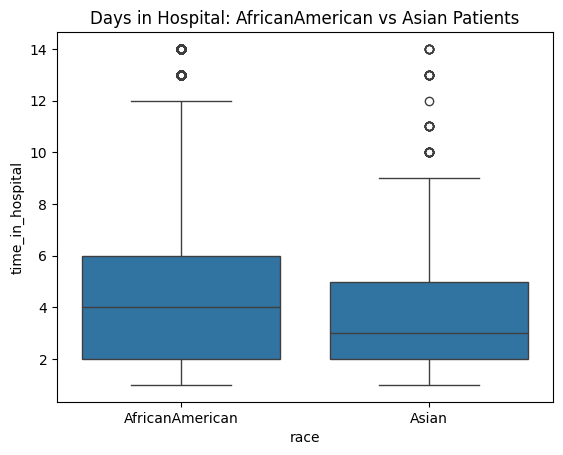

In [16]:
# box plot for all Asian and African American patients
sns.boxplot(x='race', y='time_in_hospital', data=df[df['race'].isin(['Asian', 'AfricanAmerican'])])
plt.title('Days in Hospital: AfricanAmerican vs Asian Patients')

In [24]:
# summary statistics Asian patients
group_1_df = df[df['race'] == group_1]['time_in_hospital']
group_1_df.describe()

,time_in_hospital
count,641.000000
mean,3.995320
std,2.937097
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,14.000000


In [25]:
# summary statistics African American patients
group_2_df = df[df['race'] == group_2]['time_in_hospital']
group_2_df.describe()

,time_in_hospital
count,19210.000000
mean,4.507860
std,3.047589
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,14.000000


Text(0.5, 1.0, 'Days in Hospital: AfricanAmerican vs Asian Patients Age 20-30')

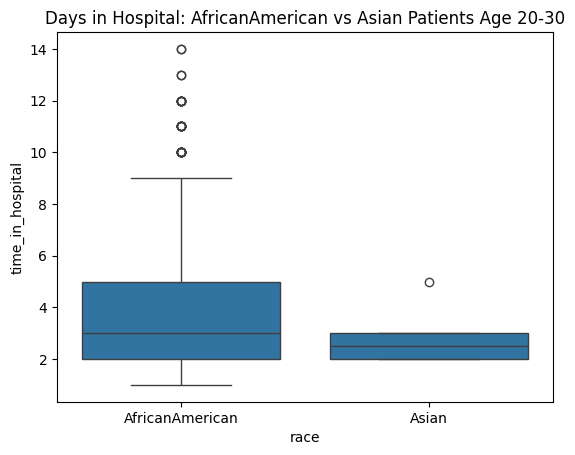

In [21]:
# box plot for all Asian and African American patients age 20-30
sns.boxplot(x='race', y='time_in_hospital', data=df[(df['race'].isin(['Asian', 'AfricanAmerican'])) & (df['age'] == '[20-30)')])
plt.title('Days in Hospital: AfricanAmerican vs Asian Patients Age 20-30')

In [28]:
# summary statistics Asian patients age 20-30
group_1_df_20s = df[(df['race'] == group_1) & (df['age'] == '[20-30)')]['time_in_hospital']
group_1_df_20s.describe()

,time_in_hospital
count,6.000000
mean,2.833333
std,1.169045
min,2.000000
25%,2.000000
50%,2.500000
75%,3.000000
max,5.000000


In [29]:
# summary statistics African American patients age 20-30
group_2_df_20s = df[(df['race'] == group_2) & (df['age'] == '[20-30)')]['time_in_hospital']
group_2_df_20s.describe()

,time_in_hospital
count,540.000000
mean,3.957407
std,2.653810
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,14.000000


Text(0.5, 1.0, 'Days in Hospital: AfricanAmerican vs Asian Patients Age 70-80')

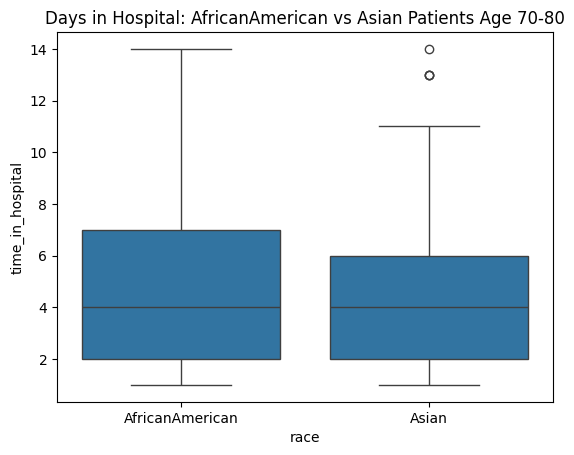

In [22]:
# box plot for all Asian and African American patients age 70-80
sns.boxplot(x='race', y='time_in_hospital', data=df[(df['race'].isin(['Asian', 'AfricanAmerican'])) & (df['age'] == '[70-80)')])
plt.title('Days in Hospital: AfricanAmerican vs Asian Patients Age 70-80')

In [30]:
# summary statistics Asian patients age 70-80
group_1_df_70s = df[(df['race'] == group_1) & (df['age'] == '[70-80)')]['time_in_hospital']
group_1_df_70s.describe()

,time_in_hospital
count,180.000000
mean,4.200000
std,2.825265
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,14.000000


In [31]:
# summary statistics African American patients age 70-80
group_2_df_70s = df[(df['race'] == group_2) & (df['age'] == '[70-80)')]['time_in_hospital']
group_2_df_70s.describe()

,time_in_hospital
count,3816.000000
mean,4.819444
std,3.144597
min,1.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,14.000000


In conclusion, Asian patients have the shortest average stay in the hospital, while African American patients have the longest average stay. African American patients spend on average 13% longer in the hospital. This difference is even larger when looking at patients age 20-30 at 40%, albeit there is a small sample size of Asian patients age 20-30. Overall, there are 19,210 African American patients and 641 Asian patients in the data set, which can likely both be attributed to the population distribution in the area the data was gathered and differences in health determinants.